In [29]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import lambertw
from mpl_toolkits import mplot3d
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

[283]
283


<IPython.core.display.Javascript object>


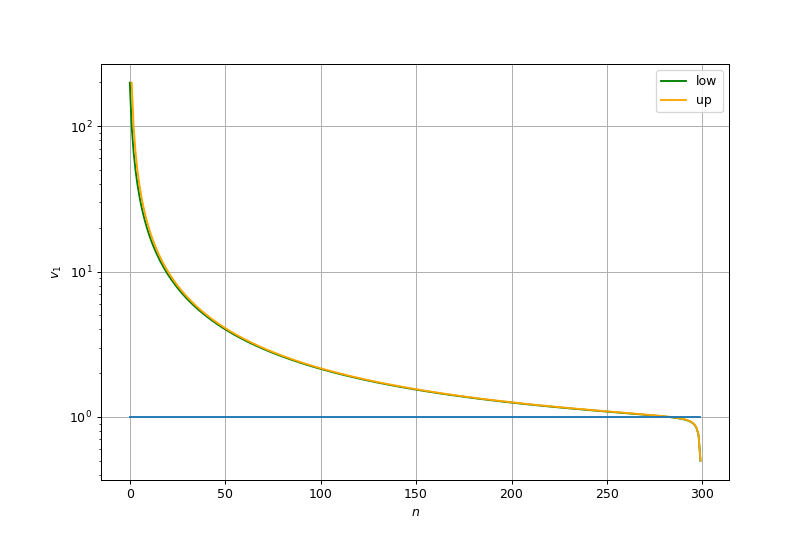

In [61]:
# some givens
slack_eps = 100
N = 300
C0 = 1

n = np.arange(N)
n_bis = np.arange(1,N)
k = np.arange(N)

C_1 = ( 6*(N**2)*slack_eps - C0*(n+1)*(2*n+1)*n ) / (N*(N-n)*(N+1+n) )
v_1 = C_1/3 * N/(1+k) / C0
v_1_bis = C_1[1:]/3 * N/n_bis
indices_1 = n[v_1>0]
ok_indices_1 = k[(v_1<=1) & (v_1>0)]
indices_1_bis = n_bis[v_1_bis>0]
ok_indices_1_bis = n_bis[(v_1_bis>1)]

print(np.intersect1d(ok_indices_1,ok_indices_1_bis))
print(ok_indices_1[0])
plt.figure(figsize=(9,6))
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$v_1$')
plt.semilogy(indices_1,v_1[v_1>0],color='green')
plt.semilogy(indices_1_bis,v_1_bis[v_1_bis>0],color='orange')
plt.semilogy(indices_1,np.ones(len(indices_1)))
plt.legend(['low','up']);

In [35]:
# fun practical
def Nb_try(slack_eps,N=250,C0=1):
    n = np.arange(N)
    C_1 = ( 6*(N**2)*slack_eps - C0*(n+1)*(2*n+1)*n ) / (N*(N-n)*(N+1+n) )
    arg_lhs = C_1/3 * N/(1+k) / C0
    arg_rhs = 1
    ok_indices_1 = n[arg_rhs>=arg_lhs]
    if len(ok_indices_1) > 0:
        return ok_indices_1[0]
    else:
        return N

<IPython.core.display.Javascript object>


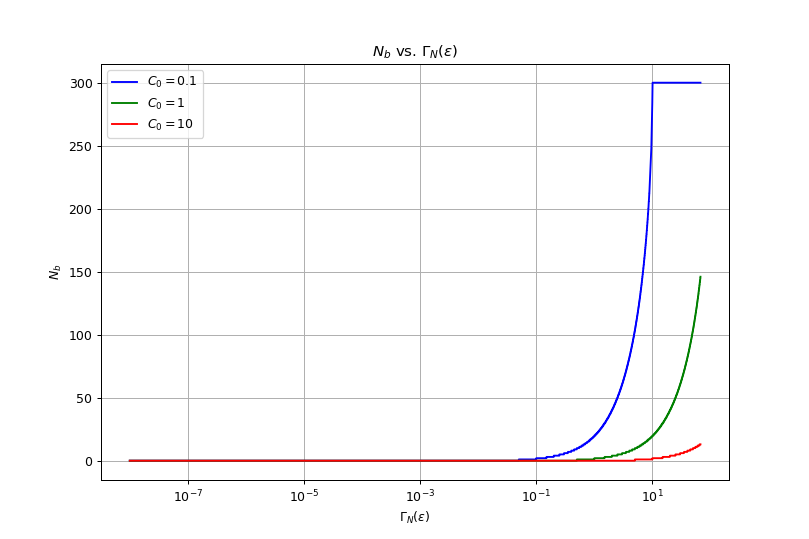

In [36]:
N = 300
C0 = 1
vector2 = np.logspace(-8,1.83,10000)

plt.figure(figsize=(9,6))

plt.grid()
plt.title('$N_b$ vs. $\Gamma_N(\epsilon)$')

C0 = 0.1

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='blue');

C0 = 1

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='green');

C0 = 10

vals = np.array([Nb_try(slack_elem,N,C0) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='red');

plt.legend(['$C_0 = 0.1$','$C_0 = 1$','$C_0 = 10$'])
plt.xlabel('$\Gamma_N(\epsilon)$')
plt.ylabel('$N_b$');
plt.savefig('Nb21_log.pdf')

In [30]:
N = 300
v_vec = np.linspace(0.8,0.995,20)
slack_eps_vec = np.logspace(-8,1.83,1000)

v_grid,slack_eps_grid = np.meshgrid(v_vec, slack_eps_vec)

Nb_grid = np.zeros(v_grid.shape)

for elem_slack_eps in np.arange(len(slack_eps_vec)):
    for elem_v in np.arange(len(v_vec)):
        slack_eps_prop,v_prop = slack_eps_grid[elem_slack_eps][elem_v],v_grid[elem_slack_eps][elem_v]
        Nb_proposal = np.ceil(N-np.real(lambertw(((1-v_prop)/C0*slack_eps_prop + v_prop**N)\
             *v_prop**(1/(1-v_prop))*(np.log(v_prop)/(1-v_prop)),-1))/np.log(v_prop)+v_prop/(1-v_prop))
        print(Nb_proposal)
        Nb_grid[elem_slack_eps][elem_v] = np.max((0,np.min((N,Nb_proposal))))

196.0
189.0
182.0
174.0
164.0
154.0
142.0
127.0
111.0
90.0
66.0
36.0
-2.0
-39.0
-53.0
-61.0
-74.0
-93.0
-132.0
-269.0
196.0
189.0
182.0
174.0
165.0
154.0
142.0
127.0
111.0
91.0
66.0
36.0
-2.0
-39.0
-53.0
-61.0
-74.0
-93.0
-132.0
-269.0
196.0
190.0
182.0
174.0
165.0
154.0
142.0
128.0
111.0
91.0
66.0
36.0
-2.0
-39.0
-53.0
-61.0
-74.0
-93.0
-132.0
-269.0
196.0
190.0
182.0
174.0
165.0
154.0
142.0
128.0
111.0
91.0
67.0
37.0
-1.0
-39.0
-53.0
-61.0
-74.0
-93.0
-132.0
-269.0
196.0
190.0
183.0
174.0
165.0
154.0
142.0
128.0
111.0
91.0
67.0
37.0
-1.0
-39.0
-53.0
-61.0
-74.0
-93.0
-132.0
-269.0
196.0
190.0
183.0
174.0
165.0
155.0
142.0
128.0
111.0
91.0
67.0
37.0
-1.0
-39.0
-52.0
-61.0
-74.0
-93.0
-132.0
-269.0
197.0
190.0
183.0
175.0
165.0
155.0
143.0
128.0
112.0
92.0
67.0
37.0
-1.0
-38.0
-52.0
-61.0
-74.0
-93.0
-132.0
-269.0
197.0
190.0
183.0
175.0
165.0
155.0
143.0
129.0
112.0
92.0
68.0
38.0
-0.0
-38.0
-52.0
-61.0
-74.0
-93.0
-132.0
-269.0
197.0
190.0
183.0
175.0
166.0
155.0
143.0
129.0
112.0
92

174.0
163.0
151.0
136.0
119.0
97.0
71.0
37.0
-6.0
-46.0
-61.0
-74.0
-93.0
-132.0
-269.0
210.0
205.0
198.0
191.0
183.0
174.0
163.0
151.0
136.0
119.0
97.0
71.0
37.0
-6.0
-46.0
-61.0
-74.0
-93.0
-132.0
-269.0
210.0
205.0
198.0
191.0
183.0
174.0
163.0
151.0
136.0
119.0
98.0
71.0
38.0
-6.0
-46.0
-61.0
-74.0
-93.0
-132.0
-269.0
211.0
205.0
199.0
191.0
183.0
174.0
164.0
151.0
137.0
119.0
98.0
72.0
38.0
-5.0
-46.0
-61.0
-74.0
-93.0
-132.0
-269.0
211.0
205.0
199.0
192.0
184.0
174.0
164.0
151.0
137.0
119.0
98.0
72.0
38.0
-5.0
-46.0
-61.0
-74.0
-93.0
-132.0
-269.0
211.0
205.0
199.0
192.0
184.0
174.0
164.0
152.0
137.0
120.0
98.0
72.0
39.0
-5.0
-46.0
-61.0
-74.0
-93.0
-132.0
-269.0
211.0
205.0
199.0
192.0
184.0
175.0
164.0
152.0
137.0
120.0
99.0
72.0
39.0
-4.0
-46.0
-61.0
-74.0
-93.0
-132.0
-269.0
211.0
205.0
199.0
192.0
184.0
175.0
164.0
152.0
137.0
120.0
99.0
73.0
39.0
-4.0
-46.0
-61.0
-74.0
-93.0
-132.0
-269.0
211.0
205.0
199.0
192.0
184.0
175.0
164.0
152.0
138.0
120.0
99.0
73.0
40.0
-4.0
-45.0


-56.0
-73.0
-93.0
-132.0
-269.0
225.0
220.0
215.0
208.0
202.0
194.0
185.0
174.0
162.0
147.0
129.0
106.0
77.0
39.0
-11.0
-56.0
-73.0
-93.0
-132.0
-269.0
225.0
220.0
215.0
209.0
202.0
194.0
185.0
174.0
162.0
147.0
129.0
106.0
78.0
40.0
-11.0
-56.0
-73.0
-93.0
-132.0
-269.0
225.0
220.0
215.0
209.0
202.0
194.0
185.0
174.0
162.0
147.0
129.0
107.0
78.0
40.0
-10.0
-55.0
-73.0
-93.0
-132.0
-269.0
225.0
220.0
215.0
209.0
202.0
194.0
185.0
175.0
162.0
147.0
129.0
107.0
78.0
40.0
-10.0
-55.0
-73.0
-93.0
-132.0
-269.0
225.0
220.0
215.0
209.0
202.0
194.0
185.0
175.0
162.0
148.0
130.0
107.0
79.0
41.0
-9.0
-55.0
-73.0
-93.0
-132.0
-269.0
225.0
220.0
215.0
209.0
202.0
194.0
185.0
175.0
163.0
148.0
130.0
107.0
79.0
41.0
-9.0
-55.0
-73.0
-93.0
-132.0
-269.0
225.0
221.0
215.0
209.0
202.0
195.0
186.0
175.0
163.0
148.0
130.0
108.0
79.0
42.0
-9.0
-55.0
-73.0
-93.0
-132.0
-269.0
225.0
221.0
215.0
209.0
203.0
195.0
186.0
175.0
163.0
148.0
130.0
108.0
79.0
42.0
-8.0
-55.0
-73.0
-93.0
-132.0
-269.0
226.0
221.0


162.0
146.0
125.0
99.0
65.0
18.0
-41.0
-72.0
-93.0
-132.0
-269.0
233.0
228.0
224.0
218.0
212.0
205.0
197.0
187.0
176.0
162.0
146.0
126.0
100.0
65.0
18.0
-40.0
-72.0
-93.0
-132.0
-269.0
233.0
228.0
224.0
218.0
212.0
205.0
197.0
187.0
176.0
163.0
146.0
126.0
100.0
66.0
19.0
-40.0
-72.0
-93.0
-132.0
-269.0
233.0
229.0
224.0
218.0
212.0
205.0
197.0
187.0
176.0
163.0
146.0
126.0
100.0
66.0
19.0
-40.0
-72.0
-93.0
-132.0
-269.0
233.0
229.0
224.0
218.0
212.0
205.0
197.0
188.0
176.0
163.0
147.0
126.0
100.0
66.0
19.0
-39.0
-72.0
-93.0
-132.0
-269.0
233.0
229.0
224.0
219.0
212.0
205.0
197.0
188.0
177.0
163.0
147.0
127.0
101.0
67.0
20.0
-39.0
-72.0
-93.0
-132.0
-269.0
233.0
229.0
224.0
219.0
213.0
206.0
197.0
188.0
177.0
163.0
147.0
127.0
101.0
67.0
20.0
-39.0
-72.0
-93.0
-132.0
-269.0
233.0
229.0
224.0
219.0
213.0
206.0
198.0
188.0
177.0
164.0
147.0
127.0
101.0
67.0
21.0
-38.0
-72.0
-93.0
-132.0
-269.0
233.0
229.0
224.0
219.0
213.0
206.0
198.0
188.0
177.0
164.0
148.0
127.0
102.0
68.0
21.0
-38.0
-

241.0
237.0
233.0
228.0
222.0
216.0
209.0
200.0
190.0
178.0
163.0
145.0
122.0
91.0
49.0
-11.0
-67.0
-93.0
-132.0
-269.0
241.0
237.0
233.0
228.0
222.0
216.0
209.0
200.0
190.0
178.0
164.0
145.0
122.0
91.0
49.0
-11.0
-67.0
-93.0
-132.0
-269.0
241.0
237.0
233.0
228.0
223.0
216.0
209.0
201.0
191.0
179.0
164.0
146.0
123.0
92.0
49.0
-10.0
-66.0
-93.0
-132.0
-269.0
241.0
237.0
233.0
228.0
223.0
216.0
209.0
201.0
191.0
179.0
164.0
146.0
123.0
92.0
50.0
-10.0
-66.0
-93.0
-132.0
-269.0
241.0
237.0
233.0
228.0
223.0
217.0
209.0
201.0
191.0
179.0
164.0
146.0
123.0
93.0
50.0
-9.0
-66.0
-93.0
-132.0
-269.0
241.0
237.0
233.0
228.0
223.0
217.0
209.0
201.0
191.0
179.0
165.0
147.0
123.0
93.0
51.0
-9.0
-66.0
-93.0
-132.0
-269.0
241.0
238.0
233.0
229.0
223.0
217.0
210.0
201.0
191.0
179.0
165.0
147.0
124.0
93.0
51.0
-8.0
-66.0
-93.0
-132.0
-269.0
242.0
238.0
233.0
229.0
223.0
217.0
210.0
201.0
191.0
180.0
165.0
147.0
124.0
94.0
52.0
-8.0
-66.0
-93.0
-132.0
-269.0
242.0
238.0
234.0
229.0
223.0
217.0
210.0
20

145.0
118.0
80.0
25.0
-47.0
-92.0
-132.0
-269.0
249.0
246.0
242.0
238.0
233.0
227.0
221.0
214.0
205.0
194.0
182.0
166.0
145.0
118.0
80.0
26.0
-47.0
-92.0
-132.0
-269.0
249.0
246.0
242.0
238.0
233.0
228.0
221.0
214.0
205.0
195.0
182.0
166.0
145.0
118.0
81.0
27.0
-47.0
-91.0
-132.0
-269.0
249.0
246.0
242.0
238.0
233.0
228.0
221.0
214.0
205.0
195.0
182.0
166.0
146.0
119.0
81.0
27.0
-46.0
-91.0
-132.0
-269.0
249.0
246.0
242.0
238.0
233.0
228.0
222.0
214.0
206.0
195.0
182.0
166.0
146.0
119.0
82.0
28.0
-46.0
-91.0
-132.0
-269.0
250.0
246.0
243.0
238.0
234.0
228.0
222.0
214.0
206.0
195.0
183.0
167.0
146.0
119.0
82.0
28.0
-45.0
-91.0
-132.0
-269.0
250.0
246.0
243.0
238.0
234.0
228.0
222.0
215.0
206.0
195.0
183.0
167.0
147.0
120.0
83.0
29.0
-45.0
-91.0
-132.0
-269.0
250.0
246.0
243.0
239.0
234.0
228.0
222.0
215.0
206.0
196.0
183.0
167.0
147.0
120.0
83.0
29.0
-45.0
-91.0
-132.0
-269.0
250.0
247.0
243.0
239.0
234.0
229.0
222.0
215.0
206.0
196.0
183.0
167.0
147.0
120.0
83.0
30.0
-44.0
-91.0
-132.0

28.0
-67.0
-131.0
-269.0
264.0
262.0
259.0
256.0
252.0
248.0
243.0
238.0
231.0
223.0
214.0
202.0
186.0
166.0
137.0
95.0
28.0
-66.0
-131.0
-269.0
264.0
262.0
259.0
256.0
252.0
248.0
244.0
238.0
232.0
224.0
214.0
202.0
187.0
166.0
138.0
96.0
29.0
-66.0
-131.0
-269.0
264.0
262.0
259.0
256.0
252.0
248.0
244.0
238.0
232.0
224.0
214.0
202.0
187.0
166.0
138.0
96.0
30.0
-65.0
-131.0
-269.0
264.0
262.0
259.0
256.0
253.0
249.0
244.0
238.0
232.0
224.0
215.0
203.0
187.0
167.0
138.0
97.0
30.0
-65.0
-130.0
-269.0
264.0
262.0
259.0
256.0
253.0
249.0
244.0
239.0
232.0
224.0
215.0
203.0
188.0
167.0
139.0
97.0
31.0
-65.0
-130.0
-269.0
265.0
262.0
259.0
256.0
253.0
249.0
244.0
239.0
232.0
225.0
215.0
203.0
188.0
168.0
139.0
98.0
32.0
-64.0
-130.0
-269.0
265.0
262.0
260.0
257.0
253.0
249.0
244.0
239.0
233.0
225.0
215.0
203.0
188.0
168.0
140.0
98.0
32.0
-64.0
-130.0
-269.0
265.0
262.0
260.0
257.0
253.0
249.0
245.0
239.0
233.0
225.0
216.0
204.0
188.0
168.0
140.0
99.0
33.0
-63.0
-130.0
-269.0
265.0
263.0
260

275.0
273.0
270.0
267.0
264.0
259.0
254.0
248.0
240.0
230.0
216.0
197.0
168.0
122.0
36.0
-103.0
-267.0
280.0
279.0
277.0
275.0
273.0
270.0
267.0
264.0
260.0
254.0
248.0
240.0
230.0
217.0
197.0
169.0
122.0
37.0
-102.0
-267.0
280.0
279.0
277.0
275.0
273.0
270.0
267.0
264.0
260.0
255.0
248.0
241.0
230.0
217.0
198.0
169.0
123.0
38.0
-101.0
-267.0
280.0
279.0
277.0
275.0
273.0
271.0
268.0
264.0
260.0
255.0
249.0
241.0
231.0
217.0
198.0
170.0
124.0
39.0
-101.0
-267.0
280.0
279.0
277.0
275.0
273.0
271.0
268.0
264.0
260.0
255.0
249.0
241.0
231.0
218.0
199.0
171.0
125.0
40.0
-100.0
-267.0
281.0
279.0
277.0
276.0
273.0
271.0
268.0
265.0
260.0
255.0
249.0
242.0
231.0
218.0
199.0
171.0
125.0
41.0
-100.0
-267.0
281.0
279.0
278.0
276.0
274.0
271.0
268.0
265.0
261.0
256.0
250.0
242.0
232.0
218.0
200.0
172.0
126.0
42.0
-99.0
-267.0
281.0
279.0
278.0
276.0
274.0
271.0
268.0
265.0
261.0
256.0
250.0
242.0
232.0
219.0
200.0
172.0
127.0
43.0
-98.0
-267.0
281.0
280.0
278.0
276.0
274.0
271.0
269.0
265.0
261.

176.0
57.0
-231.0
301.0
301.0
301.0
301.0
300.0
300.0
298.0
296.0
294.0
291.0
288.0
285.0
280.0
274.0
264.0
250.0
225.0
177.0
58.0
-230.0
301.0
301.0
301.0
301.0
300.0
300.0
298.0
296.0
294.0
292.0
289.0
285.0
281.0
274.0
265.0
250.0
226.0
179.0
60.0
-229.0
301.0
301.0
301.0
301.0
301.0
300.0
299.0
297.0
294.0
292.0
289.0
286.0
281.0
275.0
265.0
251.0
227.0
180.0
62.0
-228.0
301.0
301.0
301.0
301.0
301.0
300.0
300.0
297.0
295.0
292.0
290.0
286.0
281.0
275.0
266.0
252.0
228.0
181.0
63.0
-227.0
301.0
301.0
301.0
301.0
301.0
300.0
300.0
298.0
295.0
293.0
290.0
287.0
282.0
276.0
267.0
253.0
229.0
182.0
65.0
-227.0
301.0
301.0
301.0
301.0
301.0
301.0
300.0
299.0
296.0
293.0
291.0
287.0
282.0
276.0
267.0
253.0
230.0
183.0
67.0
-226.0
301.0
301.0
301.0
301.0
301.0
301.0
300.0
300.0
296.0
294.0
291.0
287.0
283.0
277.0
268.0
254.0
231.0
184.0
69.0
-225.0
301.0
301.0
301.0
301.0
301.0
301.0
300.0
300.0
297.0
294.0
291.0
288.0
283.0
277.0
268.0
255.0
231.0
186.0
70.0
-224.0
302.0
301.0
301.0
301.

<IPython.core.display.Javascript object>


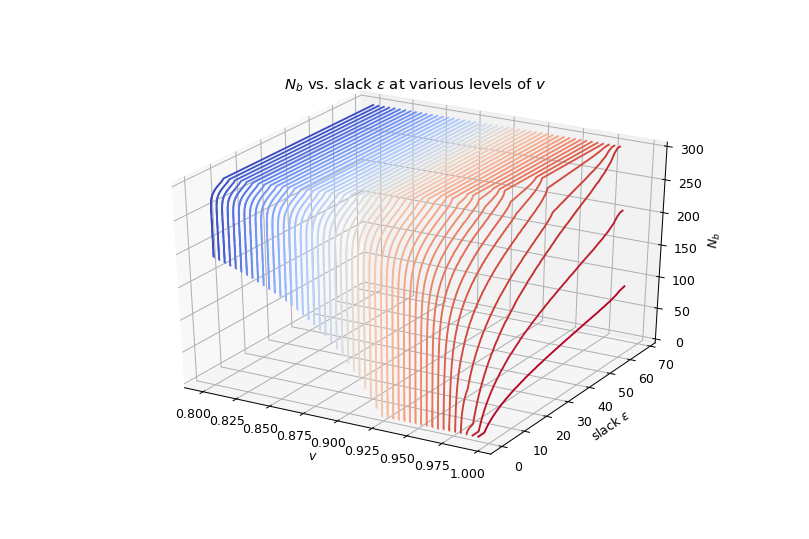

In [24]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.contour(v_grid,slack_eps_grid,Nb_grid, 50,zdir='x',cmap=cm.coolwarm)
ax.set_title('$N_b$ vs. slack $\epsilon$ at various levels of $v$');
ax.set_xlabel('$v$')
ax.set_ylabel('slack $\epsilon$')
ax.set_zlabel('$N_b$');

<IPython.core.display.Javascript object>


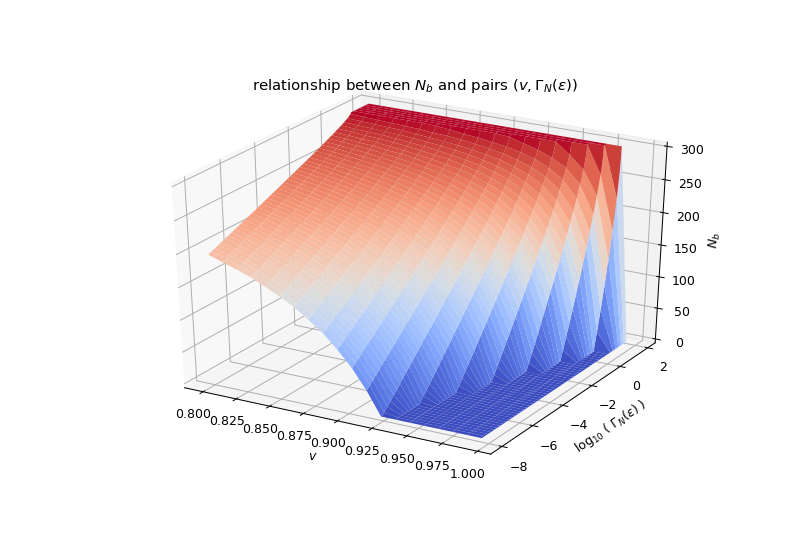

In [27]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot_surface(v_grid,np.log10(slack_eps_grid),Nb_grid,cmap=cm.coolwarm)
ax.set_title('relationship between $N_b$ and pairs ($v,\Gamma_N(\epsilon)$)');
ax.set_xlabel('$v$')
ax.set_ylabel('$\log_{10}$ ( $\Gamma_N(\epsilon)$ )')
ax.set_zlabel('$N_b$');
plt.savefig('3DNb11_log.pdf')